# Dogs vs Cats Image Classification Without Image Augmentation

## Import relevant packages 

In [1]:
# os - to read files and directory structure

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
from PIL import Image
import PIL.Image


## Load Data 

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [3]:
# This locates the file path of training and validation data sets
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/Users/apple/.keras/datasets
/Users/apple/.keras/datasets/cats_and_dogs_filtered
/Users/apple/.keras/datasets/cats_and_dogs_filtered/train
/Users/apple/.keras/datasets/cats_and_dogs_filtered/train/dogs
/Users/apple/.keras/datasets/cats_and_dogs_filtered/train/cats
/Users/apple/.keras/datasets/cats_and_dogs_filtered/validation
/Users/apple/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/Users/apple/.keras/datasets/cats_and_dogs_filtered/validation/cats
/Users/apple/.keras/datasets/fashion-mnist


In [4]:
# We'll now assign variables with the proper file path for the training and validation sets.

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

## Explore the data 

In [5]:
# Let's look at how many cats and dogs images we have in our training and validation directory

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


## Setting Model Parameters 

In [7]:
# These will be used later during the pre-processing and training stage

BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

## Data Pre-processing

In [8]:
# images must be converted into floating point format before feeding it to the model

            #STEPS
# -Read images from the disk
# -Decode contents of these images and convert it into proper grid format as per their RGB content
# -Convert them into floating point tensors
# -Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
    
# NB !!!!!>>>>>>> All these steps can be performed using the class....
# ....." tf.keras.preprocessing.image.ImageDataGenerator" 

train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data


In [9]:
# After defining our generators for training and validation images, 
# flow_from_directory method will load images from the disk,
# apply rescaling, and resize them using single line of code.

# TRAINING DATA SET !!!
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
# VALIDATION DATA SET !!!
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


## Visualize Training images 

In [11]:
# We can visualize our training images by getting a batch of images from the training generator,
# and then plotting a few of them using matplotlib
# The next function returns a batch from the dataset. 
# One batch is a tuple of (many images, many labels). 
# For now, we're discarding the labels because we just want to look at the images.

sample_training_images, _ = next(train_data_gen) 


In [15]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

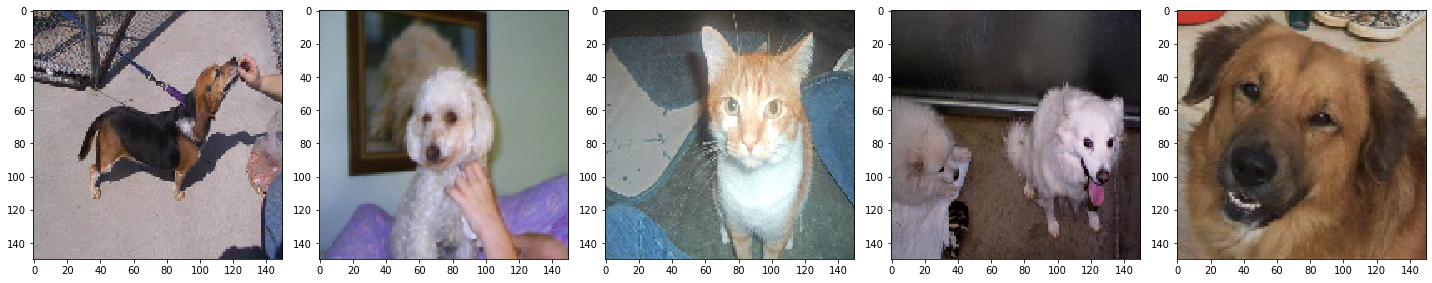

In [17]:
plotImages(sample_training_images[:5])  # Plot images 0-4

## Model Creation

In [14]:
# - The model consists of four convolution blocks with a max pool layer in each of them.
# - Then we have a fully connected layer with 512 units, with a relu activation function
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

## Compile Model 

In [18]:
# -we will use the adam optimizer
# -We would also like to look at training and validation accuracy on each epoch as we train our network,
# -so we are passing in the metrics argument
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model Summary 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Train the model 

In [ ]:
# -Since our batches are coming from a generator (ImageDataGenerator), 
# -we'll use fit_generator instead of fit

EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/100
20/20 [==============================] - 65s 3s/step - loss: 0.7272 - accuracy: 0.5260 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 64s 3s/step - loss: 0.6889 - accuracy: 0.5520 - val_loss: 0.6826 - val_accuracy: 0.5680
Epoch 3/100
20/20 [==============================] - 65s 3s/step - loss: 0.6726 - accuracy: 0.5735 - val_loss: 0.6379 - val_accuracy: 0.6200
Epoch 4/100
20/20 [==============================] - 62s 3s/step - loss: 0.6510 - accuracy: 0.6050 - val_loss: 0.6333 - val_accuracy: 0.6380
Epoch 5/100
20/20 [==============================] - 62s 3s/step - loss: 0.6114 - accuracy: 0.6615 - val_loss: 0.6058 - val_accuracy: 0.6680
Epoch 6/100
20/20 [==============================] - 62s 3s/step - loss: 0.5707 - accuracy: 0.7055 - val_loss: 0.6098 - val_acc

## Visualizing Results 

As we can see from the plots, training accuracy and validation accuracy are off by large margin and our model has achieved only around 70% accuracy on the validation set (depending on the number of epochs you trained for).

This is a clear indication of overfitting. Once the training and validation curves start to diverge, our model has started to memorize the training data and is unable to perform well on the validation data.

In [ ]:
# - We'll now visualize the results we get after training our network.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()